In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('C:\\Users\\This PC\\Downloads\\archive (3)\\Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.isna().sum()*100/len(df)

Product Name     0.000000
Brand Name      15.747874
Price            1.433646
Rating           0.000000
Reviews          0.014982
Review Votes     2.971197
dtype: float64

In [5]:
#null values can be dropped
df.dropna(inplace=True)

In [8]:
df.Rating.value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

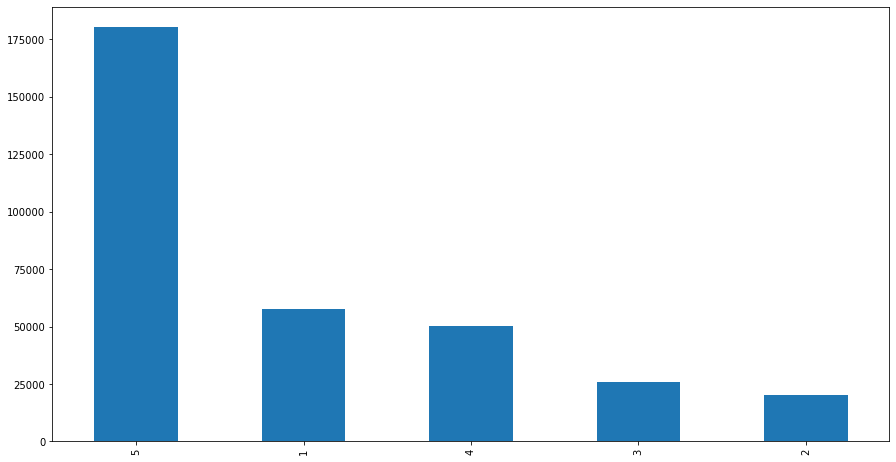

In [10]:
df.Rating.value_counts().plot.bar(figsize=(15,8))
plt.show()

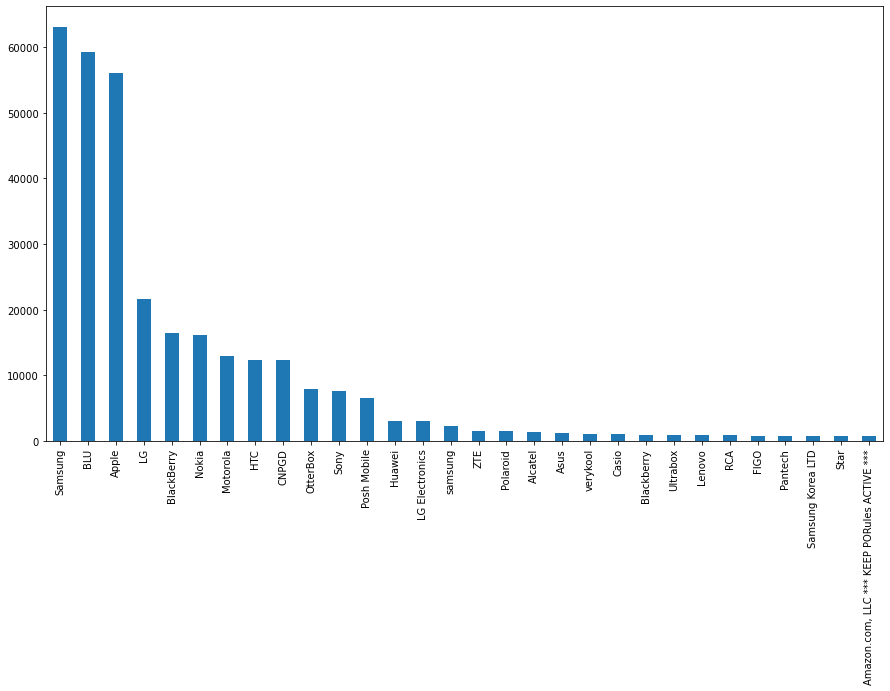

In [13]:
df['Brand Name'].value_counts()[:30].plot.bar(figsize=(15,8))
plt.show()

In [ ]:
# 3 is neutral,so to comment a positive review/negative review we need to take observations not having 3 as a value

In [14]:
df=df[df.Rating!=3]

In [17]:
df['Sentiment(P/N)'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

<ipython-input-17-046e2489de6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment(P/N)'] = np.where(df['Rating'] > 3, 1, 0)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment(P/N)
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [32]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', list(df['Reviews'])[i])
    review = review.lower().split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
corpus==np.nan

False

In [56]:

df['Reviews_new']=corpus

<ipython-input-56-04a0390a3a19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews_new']=corpus


In [57]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment(P/N),Reviews_new
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1,feel lucki found use phone us not use hard pho...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1,great phone replac lost phone thing volum butt...


In [74]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df['Reviews_new'], df['Sentiment(P/N)'],  test_size=0.2, random_state=10)

In [86]:
cv=CountVectorizer()
xtrainc=cv.fit_transform(Xtrain)
xtestc=cv.transform(Xtest)

In [87]:
from sklearn.naive_bayes import MultinomialNB
gs=MultinomialNB()
gs.fit(xtrainc,ytrain)


MultinomialNB()

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
ypred=gs.predict(xtestc)

In [90]:
#test score
accuracy_score(ytest,ypred)

0.9206565459971454

In [93]:
#confusion matrix and classification_report
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[12558  2962]
 [ 1930 44206]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.81      0.84     15520
           1       0.94      0.96      0.95     46136

    accuracy                           0.92     61656
   macro avg       0.90      0.88      0.89     61656
weighted avg       0.92      0.92      0.92     61656



In [ ]:
#using tfidf score

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5)    #minimum document frequency of 5
xtrain_tfidf = tfidf.fit_transform(Xtrain)
xtest_tfidf = tfidf.transform(Xtest)

In [95]:
gs=MultinomialNB()
gs.fit(xtrain_tfidf,ytrain)
ypred=gs.predict(xtest_tfidf)
accuracy_score(ytest,ypred)

0.91183339820942

In [96]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[11275  4245]
 [ 1191 44945]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.73      0.81     15520
           1       0.91      0.97      0.94     46136

    accuracy                           0.91     61656
   macro avg       0.91      0.85      0.87     61656
weighted avg       0.91      0.91      0.91     61656



In [ ]:
#now applying Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain_tfidf,ytrain)
ypred=lr.predict(xtest_tfidf)
accuracy_score(ytest,ypred)

C:\Users\This PC\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9412222654729466

In [98]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[13406  2114]
 [ 1510 44626]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.86      0.88     15520
           1       0.95      0.97      0.96     46136

    accuracy                           0.94     61656
   macro avg       0.93      0.92      0.92     61656
weighted avg       0.94      0.94      0.94     61656



In [ ]:
#using n-grams  #bi-gram

In [112]:
tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,2))    
xtrain_tfidf = tfidf.fit_transform(Xtrain)
xtest_tfidf = tfidf.transform(Xtest)

In [113]:
lr=LogisticRegression()
lr.fit(xtrain_tfidf,ytrain)
ypred=lr.predict(xtest_tfidf)
accuracy_score(ytest,ypred)

C:\Users\This PC\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9601985208252238

In [103]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[14027  1493]
 [  961 45175]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.90      0.92     15520
           1       0.97      0.98      0.97     46136

    accuracy                           0.96     61656
   macro avg       0.95      0.94      0.95     61656
weighted avg       0.96      0.96      0.96     61656



In [104]:
tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,1))       #unigram
xtrain_tfidf = tfidf.fit_transform(Xtrain)
xtest_tfidf = tfidf.transform(Xtest)

In [105]:
lr=LogisticRegression()
lr.fit(xtrain_tfidf,ytrain)
ypred=lr.predict(xtest_tfidf)
accuracy_score(ytest,ypred)

C:\Users\This PC\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9412222654729466

In [106]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[13406  2114]
 [ 1510 44626]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.86      0.88     15520
           1       0.95      0.97      0.96     46136

    accuracy                           0.94     61656
   macro avg       0.93      0.92      0.92     61656
weighted avg       0.94      0.94      0.94     61656



In [107]:
#tri-gram
tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,3))  
xtrain_tfidf = tfidf.fit_transform(Xtrain)
xtest_tfidf = tfidf.transform(Xtest)

In [108]:
lr=LogisticRegression()
lr.fit(xtrain_tfidf,ytrain)
ypred=lr.predict(xtest_tfidf)
accuracy_score(ytest,ypred)

C:\Users\This PC\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9610743479953289

In [109]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))
print('classification_report',classification_report(ytest,ypred))

confusion matrix 
 [[14059  1461]
 [  939 45197]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.91      0.92     15520
           1       0.97      0.98      0.97     46136

    accuracy                           0.96     61656
   macro avg       0.95      0.94      0.95     61656
weighted avg       0.96      0.96      0.96     61656



In [114]:
print(lr.predict(tfidf.transform(['not an issue, phone is working', 
                                    'an issue, phone is not working'])))

[0 0]
